In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import sunpy.map as smap
import astropy.units as u
#from astropy.io import fits

In [3]:
from astropy.coordinates import SkyCoord

In [4]:
imagen = smap.Map('/Volumes/VALERIA/DAVELCT/20141017/hmi.Ic_45s.20141017_090000_TAI.2.continuum.fits')

/Users/valeriaquinteroortega/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


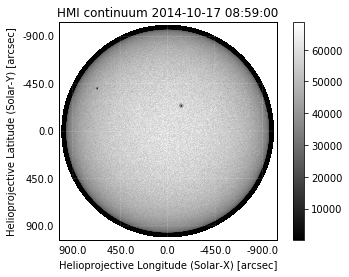

In [5]:
imagen.peek()
plt.show()

In [6]:
imagen

SunPy Map
---------
Observatory:		 SDO
Instrument:		 HMI FRONT2
Detector:		 HMI
Measurement:		 continuum
Wavelength:		 6173.0 Angstrom
Observation Date:	 2014-10-17 08:59:00
Exposure Time:		 0.000000 s
Dimension:		 [ 4096.  4096.] pix
Coordinate System:	 helioprojective
Scale:			 [ 0.504315  0.504315] arcsec / pix
Reference Pixel:	 [ 2042.086304  2046.97876 ] pix
Reference Coord:	 [ 0.  0.] arcsec

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)

#       En ipython la abro y busco el centroide ideal

In [12]:
x = -130*u.arcsec
y = -240.9 * u.arcsec

l = 100 * u.arcsec

In [13]:
bl = SkyCoord(x-l, y-l, frame = imagen.coordinate_frame)
ur = SkyCoord(x+l, y+l, frame = imagen.coordinate_frame)

In [14]:
submap = imagen.submap(bl,ur)

/Users/valeriaquinteroortega/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


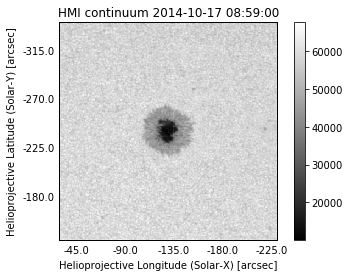

In [15]:
submap.peek()
plt.show()

# Ahora la parte de la transformación de coordenadas

In [16]:
from sunpy.coordinates import frames 

In [17]:
c0 = SkyCoord(x, y, frame = frames.Helioprojective, obstime = imagen.meta['date-obs'])

In [18]:
c0

<SkyCoord (Helioprojective: obstime=2014-10-17 08:59:00.900000, rsun=695508.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2014-10-17 08:59:00.900000): (lon, lat, radius) in (deg, deg, AU)
    ( 0.,  5.71224713,  0.99665273)>): (Tx, Ty) in arcsec
    (-130., -240.9)>

In [19]:
c1 = c0.transform_to(frames.HeliographicStonyhurst)

In [20]:
c1

<SkyCoord (HeliographicStonyhurst: obstime=2014-10-17 08:59:00.900000): (lon, lat, radius) in (deg, deg, km)
    (-7.82211086, -8.77493051,  695508.00000083)>